<h1> Open University Dataset<h1>

In this notebook, I will discuss how a number of algorithms were investigated to predict whether a student would pass an assessment based on the number of interactions with the course material.

In [208]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

After checking whether there were any missing values, the first step was familiarising myself with the data in the Dataset. This could potentially allow me to better optimise my final algorithm.   

The process of familiarising myself with the data took the route of :
<ul>
    <li> Finding more about the demographic of the students </li>
    <li> Investigating Pass/Fail breakdown and how the students' education affects it</li> 
    <li> Examining the assessment options within the dataset</li>
    <li> Creating histograms/KDE of Pass/Fail based on interactions of the students</li>
</ul>

Text(0.5, 1.0, 'Pass/Fail of >35')

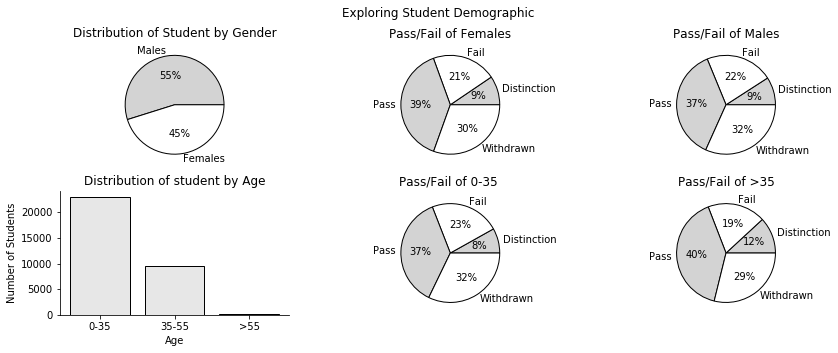

In [209]:

df = pd.read_csv("studentInfo.csv")

gender = df["gender"].value_counts()
age = df.groupby(["age_band","final_result"])["gender"].count()
gender_df = df.groupby(["gender","final_result"])["gender"].agg(["count"])
age = age.unstack()
age["total"] =age["Distinction"] + age["Pass"] + age["Fail"] + age["Withdrawn"]



fig = plt.figure(figsize=(14,5))
g = gs.GridSpec(2,3)
ax = fig.add_subplot(g[0,0])
ax1 = fig.add_subplot(g[0,1])
ax2 = fig.add_subplot(g[0,2])
ax3 = fig.add_subplot(g[1,0])
ax4 = fig.add_subplot(g[1,1])
ax5 = fig.add_subplot(g[1,2])

fig.suptitle("Exploring Student Demographic")

ax.pie(gender, labels=["Males","Females"], autopct='%.0f%%', colors=["#D3D3D3","white"], wedgeprops = {'edgecolor' : "black", 'linewidth':1 })
ax.set_title("Distribution of Student by Gender")
ax1.pie(gender_df.loc["F"], labels=gender_df.loc["F"].index, autopct="%.0f%%",
       colors=["#D3D3D3","white","#D3D3D3","white"], wedgeprops = {'edgecolor' : "black", 'linewidth':1 })
ax1.set_title("Pass/Fail of Females")

ax2.pie(gender_df.loc["M"], labels=gender_df.loc["M"].index, autopct="%.0f%%",
       colors=["#D3D3D3","white","#D3D3D3","white"], wedgeprops = {'edgecolor' : "black", 'linewidth':1 })
ax2.set_title("Pass/Fail of Males")


ax3.bar(['0-35',"35-55",">55"],age["total"],color =(0.1,0.1,0.1,0.1) , edgecolor="black", linewidth=1)
ax3.set_title("Distribution of student by Age")
ax3.set_ylabel("Number of Students")
ax3.set_xlabel("Age")
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

age = age.drop("total",axis=1)

ax4.pie(age.loc["0-35"], autopct="%.0f%%", labels=gender_df.loc["M"].index,
       colors=["#D3D3D3","white","#D3D3D3","white"], wedgeprops = {'edgecolor' : "black", 'linewidth':1 })
ax4.set_title("Pass/Fail of 0-35 ")

ax5.pie(age.loc["35-55"], autopct="%.0f%%", labels=gender_df.loc["M"].index,
       colors=["#D3D3D3","white","#D3D3D3","white"], wedgeprops = {'edgecolor' : "black", 'linewidth':1 })
ax5.set_title("Pass/Fail of >35")

The dataset was slightly skewed towards males and heavily skewed to students under the age of 35. However, those factors didn't seem to affect the pass / fail rate of the students, and so it won't be necessary for that variable to be calculated by the chosen algorithm.

I then examined the breakdown of the Pail/fail rate and investigated whether the students' education affected that rate. 

Text(0.5, 1.0, 'All Results')

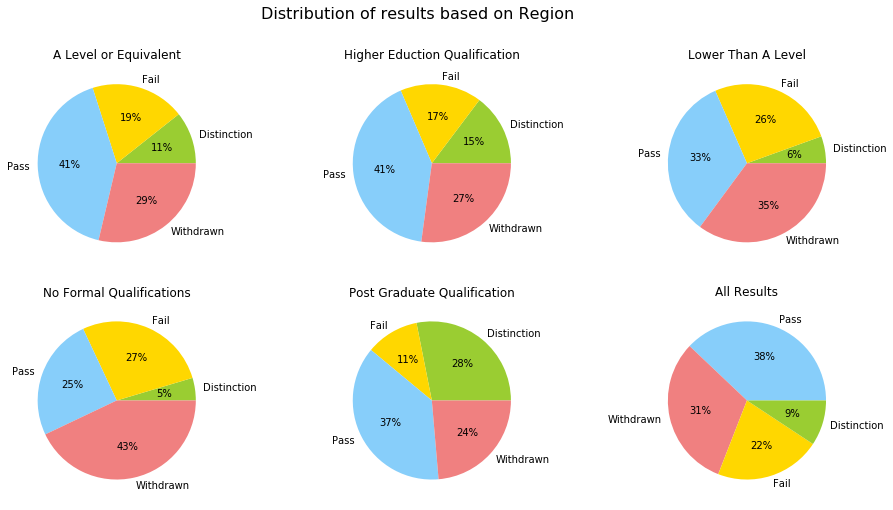

In [210]:

education = df.groupby(["highest_education","final_result"])["gender"].agg(["count"])
total_education = df['final_result'].value_counts()

fig = plt.figure(figsize=(16,8))
g = gs.GridSpec(2,3)
ax = fig.add_subplot(g[0,0])
ax1 = fig.add_subplot(g[0,1])
ax2 = fig.add_subplot(g[0,2])
ax3 = fig.add_subplot(g[1,0])
ax4 = fig.add_subplot(g[1,1])
ax5 = fig.add_subplot(g[1,2])

fig.suptitle("Distribution of results based on Region" , fontsize=16)


ax.pie(education.loc["A Level or Equivalent"], labels=education.loc["A Level or Equivalent"].index, autopct="%.0f%%",
      colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'])
ax.set_title("A Level or Equivalent")
ax1.pie(education.loc["HE Qualification"], labels=education.loc["HE Qualification"].index, autopct="%.0f%%",
        colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'])
ax1.set_title("Higher Eduction Qualification")
ax2.pie(education.loc["Lower Than A Level"], labels=education.loc["Lower Than A Level"].index, autopct="%.0f%%",
        colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'])
ax2.set_title("Lower Than A Level")
ax3.pie(education.loc["No Formal quals"], labels=education.loc["No Formal quals"].index, autopct="%.0f%%",
        colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'])
ax3.set_title("No Formal Qualifications")
ax4.pie(education.loc["Post Graduate Qualification"], labels=education.loc["Post Graduate Qualification"].index, autopct="%.0f%%",
        colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'])
ax4.set_title("Post Graduate Qualification")


colordict={"Fail":"gold","Distinction":"yellowgreen","Withdrawn":"lightcoral","Pass":"lightskyblue"}
pie_5 = ax5.pie(total_education, labels=total_education.index, autopct="%.0f%%")
for wedge in pie_5[0]:
    wedge.set_facecolor(colordict[wedge.get_label()])
ax5.set_title("All Results")



We can see that the "Lower than A level" and "No Formal Qualification" has a higher fail and withdrawn rate than the other groups. This could be a significant extra feature that we could add later to our algorithm to improve its performance. Additionally, if we want our algorithm to be able to predict whether our user will be able to get a distinction, the Post Graduate Students have a significant greater likelihood to achieve a distinction. Therefore, it could be used as an extra feature to predict a student's performance.

The next step was to examine how the students were assessed.

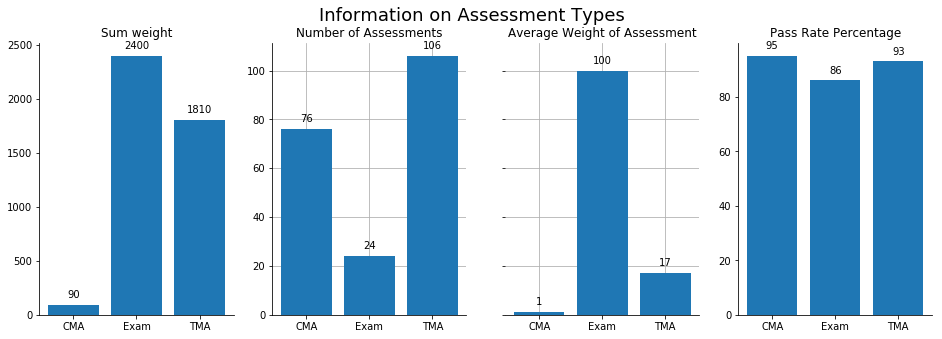

In [211]:
import numpy as np

df = pd.read_csv("assessments.csv")
courses_df = pd.read_csv("studentAssessment.csv")
courses_df["score"] = courses_df["score"].replace("?",np.nan)
courses_df = courses_df.dropna()
new_df = df[["id_assessment" , "assessment_type"]]
courses_df = pd.merge(courses_df ,new_df, on="id_assessment", how="inner")


courses_df["Pass"] = courses_df["score"].apply(lambda x : 1 if int(x) > 40 else 0 )
courses_df["Fail"] = courses_df["score"].apply(lambda x : 1 if int(x) <= 40 else 0 )
courses_df = courses_df.groupby("assessment_type")[["Pass","Fail"]].agg(["sum"])
courses_df["average"] = courses_df.xs('Pass', axis=1) / (courses_df.xs("Pass",axis =1 ) + courses_df.xs("Fail", axis=1))
courses_df["average"] = courses_df["average"].apply(lambda x : int(x * 100) )




assessments_df = df.groupby("assessment_type")["weight"].agg(["count","sum","mean"])
fig = plt.figure(figsize=(16,5))
g = gs.GridSpec(1,4,fig)
ax = fig.add_subplot(g[0,0])
ax1 = fig.add_subplot(g[0,1])
ax2 = fig.add_subplot(g[0,2] , sharey = ax1)
ax3 = fig.add_subplot(g[0,3])

ax1.bar(assessments_df.index, assessments_df["count"],zorder=2)
ax1.grid(zorder=1)
ax1.set_title("Number of Assessments")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)


ax.bar(assessments_df.index, assessments_df["sum"])
ax.set_title("Sum weight")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax2.bar(assessments_df.index, assessments_df["mean"],zorder=2)
ax2.set_title("Average Weight of Assessment")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)

ax3.bar(courses_df.index, courses_df.xs("average", axis=1))
ax3.set_title("Pass Rate Percentage")
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)


charts = [ax,ax1,ax2,ax3]
for chart in charts:
    for bar in chart.patches:
        chart.annotate(int(bar.get_height()),(bar.get_x() + bar.get_width()/2, bar.get_height()) , va="center", ha="center", xytext = (0,10), textcoords = "offset pixels")
ax2.grid(zorder =1 )
fig.suptitle("Information on Assessment Types", fontsize=18)
plt.setp(ax2.get_yticklabels(), visible=False)
del df





The charts above show a need to improve the data that is collected. The graphs show that the two main assessment types are Tutor Marked assignments (TMA) and Exams, with exams having a slightly greater possibility of affecting a student's grade. However, if we look at the pass rate, we can see a significant difference between exams and TMA as there are 7 % more students passing the TMA than Exam. This could potential indicate that Exams are more difficult and that a greater amount of interaction needs to occur to get a pass.

However, with the current data we are unable to separate the two assessment types and see whether there is a different range of material interaction needed to achieve a pass. This could have a big impact with the performance of our algorithm as the overlap between the two ranges could result in a number of misclassified predictions. 

To improve the dataset, data needs to be added that would allow a separation of the interactivity of the Exams and the TMAs.

The next stage was an examination of the distribution of the Pass / Fail / Distinction. 

In [212]:
interactivity_df = pd.read_csv("studentVle.csv")
student_df = pd.read_csv("studentInfo.csv")
courses_df = pd.read_csv("studentAssessment.csv")


In [213]:
clicks = interactivity_df.groupby(["id_student","code_module"])["sum_click"].agg(["sum"])

In [214]:
import seaborn as sns

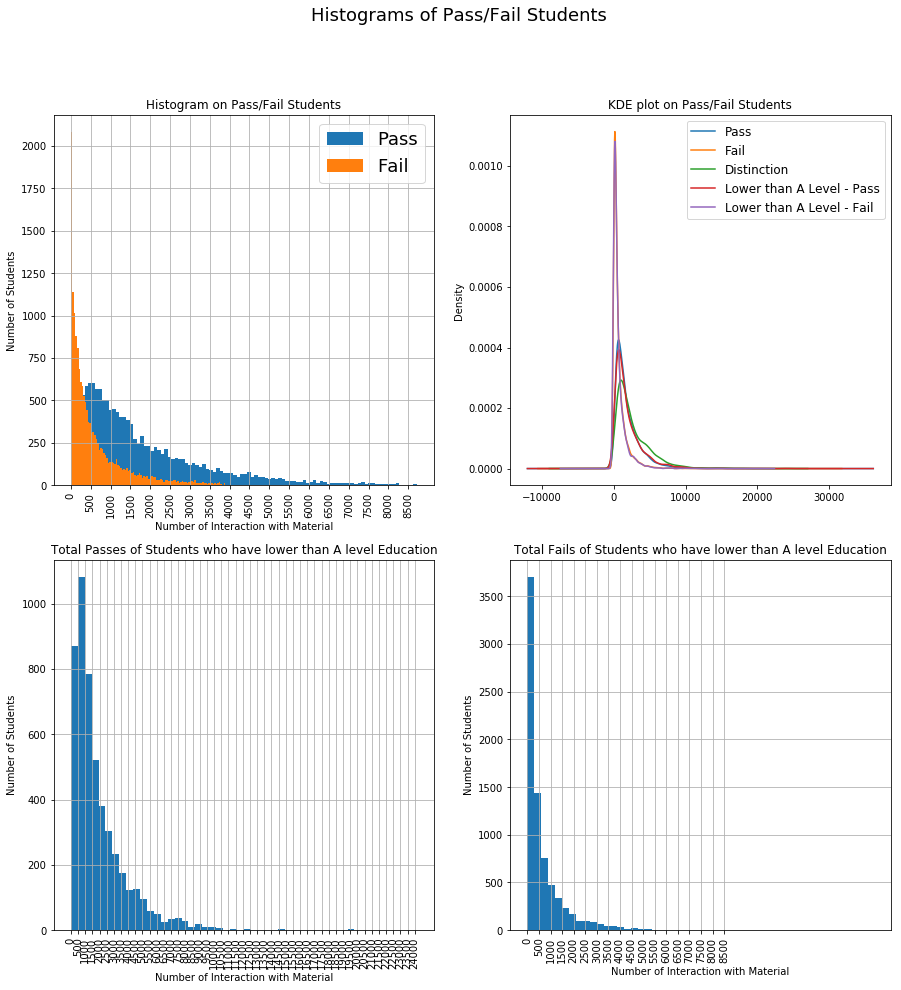

In [215]:
 
new_student_df = student_df[["id_student","final_result"]]
total_click = pd.merge(clicks,new_student_df,on ="id_student",how="inner")
pass_df = total_click[total_click['final_result']=="Pass"]
dis_df = total_click[total_click['final_result'] == "Distinction"]
fail_df = total_click[(total_click['final_result']!="Pass") & (total_click['final_result'] !="Distinction")]
    
    
student_df = student_df[["id_student","code_module","highest_education","final_result"]]
education_click = pd.merge(clicks,student_df,on ="id_student",how="inner")
lower_A_level = education_click[(education_click["highest_education"] =="Lower Than A Level") | (education_click["highest_education"] =="No Formal quals") ]
pass_lower_A = lower_A_level[lower_A_level['final_result']=="Pass"]
fail_lower_A = lower_A_level[(lower_A_level['final_result']!="Pass") & (lower_A_level['final_result'] !="Distinction")]


fig = plt.figure(figsize=(15,15))
g = gs.GridSpec(2,2,fig)
ax = fig.add_subplot(g[0,0])
ax1= fig.add_subplot(g[0,1])
ax2 = fig.add_subplot(g[1,0])
ax3 = fig.add_subplot(g[1,1])

fig.suptitle("Histograms of Pass/Fail Students",fontsize=18)
ax.set_title("Histogram on Pass/Fail Students")
ax_graph1 = pass_click['sum'].hist(bins=100,ax=ax)
ax.set_ylabel("Number of Students")
ax.set_xlabel("Number of Interaction with Material")
label = list(range(0,max(pass_click["sum"]),500))
ax.set_xticks(label)
ax_graph2 = fail_click["sum"].hist(bins=100, ax=ax)
ax.legend(labels=["Pass","Fail"],fontsize=18)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
new_pass_df['sum'].plot.kde(ax=ax1)
new_fail_df["sum"].plot.kde(ax=ax1)
new_dis_df ["sum"].plot.kde(ax=ax1)
pass_lower_A['sum'].plot.kde(ax=ax1)
fail_lower_A["sum"].plot.kde(ax=ax1)
ax1.set_title("KDE plot on Pass/Fail Students")
ax1.legend(labels=["Pass","Fail","Distinction","Lower than A Level - Pass","Lower than A Level - Fail"],fontsize=12)


pass_lower_A['sum'].hist(bins=50,ax=ax2)
ax2.set_ylabel("Number of Students")
ax2.set_xlabel("Number of Interaction with Material")
label2 = list(range(0,max(pass_lower_A["sum"]),500))
ax2.set_title("Total Passes of Students who have lower than A level Education")
ax2.set_xticks(label2)
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    
    
fail_lower_A["sum"].hist(bins=50, ax=ax3)
ax3.set_xticks(label)
ax3.set_title("Total Fails of Students who have lower than A level Education")
ax3.set_ylabel("Number of Students")
ax3.set_xlabel("Number of Interaction with Material")
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)    

From the graphs above, we can see that the fail has a Gaussian Distribution and the pass / Distinction has a Gamma distribution. The KDE plot clearly shows the overlap between the classes, which will make it difficult to get high accuracy for the machine learning algorithm. 

Therefore, it was decide to initially has 3 classes; pass, fail and distinction, and then to do further investigate having only two classes; pass and fail. For universities and the majority of students, there would be a strong emphasis on monitoring students on the pass/ fail boundary rather than the pass / distinction boundary. 

<h1>Exploring the Machine learning algorithms<h1>

After exploring the data, a number of algorithms were picked to fit the data to. The algorithms that the report initially experiment with included : 
<ul> 
    <li> Logistic Regression</li>
    <li> Decision Tree</li>
    <li> KNN </li>
    <li> Random Forest</li>
    <li> Naive Bayes </li>
    <li> Support Vector Machine</li>
</ul>

For each classifier, the data was fitted and the classification report was made,which included information about the Precision, recall and F1 score. 

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics

In [217]:
total_click["final_result"] = total_click["final_result"].apply(lambda x : 1 if x == "Pass" else ( 2 if x =="Distinction" else 0))
features = total_click["sum"].values
label = total_click["final_result"].values

In [218]:
features = features.reshape(-1, 1)
label = label.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(features, label)

In [219]:
models = [
    LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100),
    svm.SVC(gamma='scale', decision_function_shape='ovo'),
    GaussianNB()
]

In [220]:
model_name = []
acc_list = []
prec_list = []
recall_list = []
fscore_list = []
for model in models :
    print(clf.__class__.__name__)
    clf = model.fit(X_train,y_train.ravel())
    prediction = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, prediction)
    print(metrics.classification_report(y_test, prediction, target_names=["Fail","Pass","Distinction"]))
    prec_list.append(metrics.precision_score(y_test,prediction,average=None))
    recall_list.append(metrics.recall_score(y_test,prediction, average=None))
    fscore_list.append(metrics.f1_score(y_test,prediction,average=None))
    model_name.append(clf.__class__.__name__)
    acc_list.append(acc)
    

LogisticRegression
              precision    recall  f1-score   support

        Fail       0.61      0.84      0.71      4070
        Pass       0.59      0.48      0.53      3575
 Distinction       0.38      0.01      0.03       926

   micro avg       0.60      0.60      0.60      8571
   macro avg       0.53      0.45      0.42      8571
weighted avg       0.58      0.60      0.56      8571

LogisticRegression
              precision    recall  f1-score   support

        Fail       0.62      0.76      0.69      4070
        Pass       0.56      0.51      0.53      3575
 Distinction       0.30      0.12      0.17       926

   micro avg       0.59      0.59      0.59      8571
   macro avg       0.50      0.46      0.46      8571
weighted avg       0.56      0.59      0.57      8571

DecisionTreeClassifier
              precision    recall  f1-score   support

        Fail       0.63      0.72      0.67      4070
        Pass       0.55      0.56      0.55      3575
 Distinction  

I then plotted the relevant information on graphs.

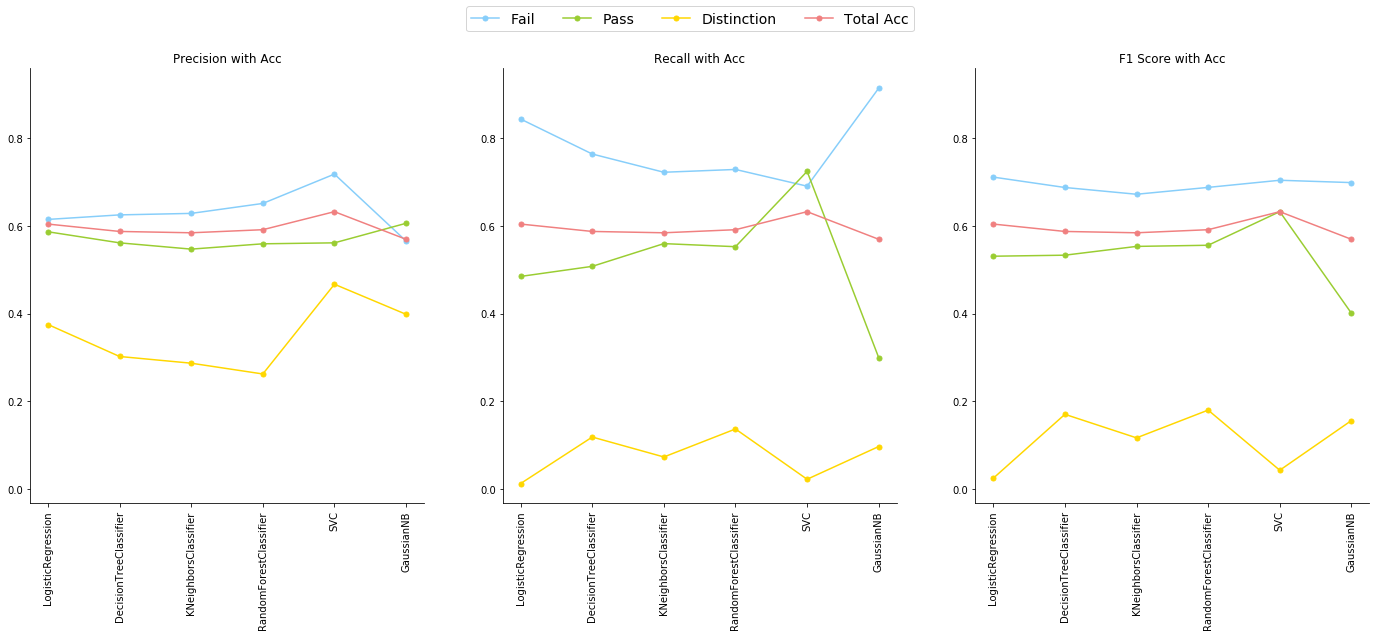

In [222]:
pre_fail = []
pre_pass = []
pre_dis = []

recall_fail = []
recall_pass = []
recall_dis = []

f1_fail = []
f1_pass = []
f1_dis = []

for model in prec_list:
    pre_fail.append(model[0])
    pre_pass.append(model[1])
    pre_dis.append(model[2])
    
for model in recall_list:
    recall_fail.append(model[0])
    recall_pass.append(model[1])
    recall_dis.append(model[2])
    
for model in fscore_list:
    f1_fail.append(model[0])
    f1_pass.append(model[1])
    f1_dis.append(model[2])
    
    
fig = plt.figure(figsize=(24,8))
g =gs.GridSpec(1,3,fig)
ax = fig.add_subplot(g[0,1])
ax1 = fig.add_subplot(g[0,0], sharey=ax)
ax2 = fig.add_subplot(g[0,2],sharey=ax)



ax1.plot(pre_fail, ls= "-", marker=".",ms=10, color = "lightskyblue")
ax1.plot(pre_pass,ls= "-", marker=".",ms=10, color = "yellowgreen")
ax1.plot(pre_dis,ls= "-", marker=".",ms=10, color = "gold")
ax1.plot(acc_list,ls= "-", marker=".",ms=10,color="lightcoral")  
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_title("Precision with Acc")

ax.plot(recall_fail, ls= "-", marker=".",ms=10 , color = "lightskyblue")
ax.plot(recall_pass,ls= "-", marker=".",ms=10 , color = "yellowgreen")
ax.plot(recall_dis,ls= "-", marker=".",ms=10, color = "gold")
ax.plot(acc_list,ls= "-", marker=".",ms=10, color="lightcoral")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Recall with Acc")


ax2.plot(f1_fail, ls= "-", marker=".",ms=10 , color = "lightskyblue")
ax2.plot(f1_pass,ls= "-", marker=".",ms=10 , color = "yellowgreen")
ax2.plot(f1_dis,ls= "-", marker=".",ms=10, color = "gold")
ax2.plot(acc_list,ls= "-", marker=".",ms=10, color="lightcoral")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_title("F1 Score with Acc")

graphs = [ax,ax1,ax2]
for ax in graphs:
    ax.set_xticks(np.arange(0,len(model_name)))
    ax.set_xticklabels(model_name)
    for x in ax.get_xticklabels():
        x.set_rotation(90)

fig.legend(["Fail","Pass","Distinction","Total Acc"],loc='upper center',fontsize=14,ncol=4) 
    
    
    
    

As noted earlier on in the report, the overlap of the distinction and pass is affecting the pass performance. In this model, I will be using the pass performance in both precision and recall as the performance indicate of the model. This is due to the fact that the university could use this information to better inform the students about their potential results.  Therefore, it is more important to achieve: 
<br>
<br>
1) High Precision - What proportion of positive identifications was actually correct? (Primary Goal)<br>
2) High Recall - What proportion of actual positives was identified correctly?(Secondary Goal)
<br>
<br>
as the outcome of telling a student that the likelihood of them passing is high and then due to that information, the student eases off their studying resulting in failing, will be far worst than the algorithm informing the student that he will fail at the current material interactivity and then the student passing. 
<br>
Therefore, to improve the precision and recall, the class "Distinction" was merged with "Pass", and another performance check was done on the algorithms.

In [240]:
models2 = [
    LogisticRegression(solver ="lbfgs"),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100),
    svm.SVC(gamma='scale'),
    GaussianNB()
    
]

In [244]:
total_click2 = total_click
total_click2["final_result"] = total_click2["final_result"].apply(lambda x : 1 if x == 2 else x )
features2 = total_click2["sum"].values
label2 = total_click2["final_result"].values
features2 = features2.reshape(-1, 1)
label2 = label.reshape(-1,1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, label2)
model_name2 = []
acc_list2 = []
prec_list2 = []
recall_list2 = []
fscore_list2 = []

for model in models2 :
    print(model.__class__.__name__)
    clf = model.fit(X_train2,y_train2.ravel())
    prediction2 = clf.predict(X_test2)
    acc2 = metrics.accuracy_score(y_test2,prediction2)
    print("Accuracy", acc2)
    
    target_names2 = ['fail', 'pass']
    print(metrics.classification_report(y_test2, prediction2, target_names=target_names2))
    prec_list2.append(metrics.precision_score(y_test2,prediction2,average=None))
    recall_list2.append(metrics.recall_score(y_test2,prediction2, average=None))
    fscore_list2.append(metrics.f1_score(y_test2,prediction2,average=None))
    model_name2.append(model.__class__.__name__)
    acc_list2.append(acc2)

LogisticRegression
Accuracy 0.693618014234045
              precision    recall  f1-score   support

        fail       0.65      0.79      0.71      4149
        pass       0.75      0.60      0.67      4422

   micro avg       0.69      0.69      0.69      8571
   macro avg       0.70      0.70      0.69      8571
weighted avg       0.70      0.69      0.69      8571

DecisionTreeClassifier
Accuracy 0.6798506591996266
              precision    recall  f1-score   support

        fail       0.65      0.72      0.68      4149
        pass       0.71      0.64      0.68      4422

   micro avg       0.68      0.68      0.68      8571
   macro avg       0.68      0.68      0.68      8571
weighted avg       0.68      0.68      0.68      8571

KNeighborsClassifier
Accuracy 0.6897678217244195
              precision    recall  f1-score   support

        fail       0.69      0.65      0.67      4149
        pass       0.69      0.72      0.71      4422

   micro avg       0.69      0.69   

I then plotted the results on graphs to compare the results.

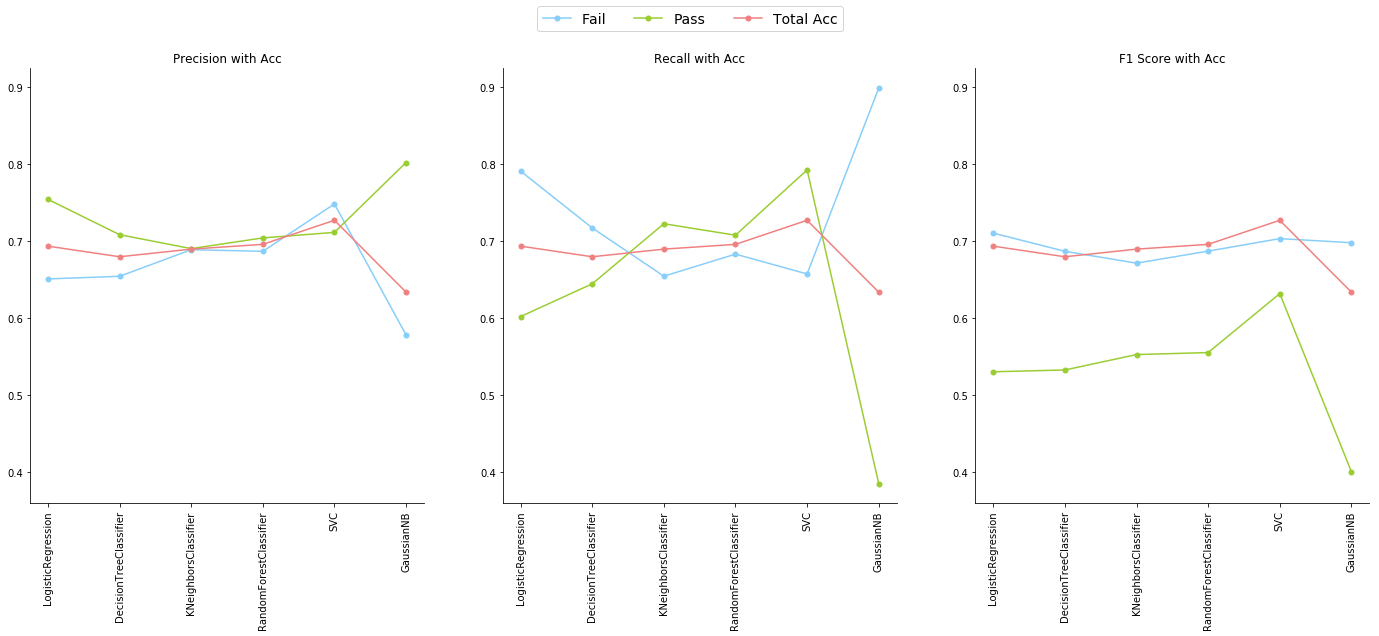

In [246]:
pre_fail2 = []
pre_pass2 = []

recall_fail2 = []
recall_pass2 = []


f1_fail2 = []
f1_pass2 = []


for model in prec_list2:
    pre_fail2.append(model[0])
    pre_pass2.append(model[1])
   
    
for model in recall_list2:
    recall_fail2.append(model[0])
    recall_pass2.append(model[1])
    
    
for model in fscore_list:
    f1_fail2.append(model[0])
    f1_pass2.append(model[1])
    
    
    
fig = plt.figure(figsize=(24,8))
g =gs.GridSpec(1,3,fig)
ax = fig.add_subplot(g[0,1])
ax1 = fig.add_subplot(g[0,0], sharey=ax)
ax2 = fig.add_subplot(g[0,2],sharey=ax)



ax1.plot(pre_fail2, ls= "-", marker=".",ms=10, color = "lightskyblue")
ax1.plot(pre_pass2,ls= "-", marker=".",ms=10, color = "yellowgreen")
ax1.plot(acc_list2,ls= "-", marker=".",ms=10,color="lightcoral")  
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_title("Precision with Acc")

ax.plot(recall_fail2, ls= "-", marker=".",ms=10 , color = "lightskyblue")
ax.plot(recall_pass2,ls= "-", marker=".",ms=10 , color = "yellowgreen")
ax.plot(acc_list2,ls= "-", marker=".",ms=10, color="lightcoral")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Recall with Acc")


ax2.plot(f1_fail2, ls= "-", marker=".",ms=10 , color = "lightskyblue")
ax2.plot(f1_pass2,ls= "-", marker=".",ms=10 , color = "yellowgreen")
ax2.plot(acc_list2,ls= "-", marker=".",ms=10, color="lightcoral")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_title("F1 Score with Acc")

graphs = [ax,ax1,ax2]
for ax in graphs:
    ax.set_xticks(np.arange(0,len(model_name)))
    ax.set_xticklabels(model_name)
    for x in ax.get_xticklabels():
        x.set_rotation(90)

fig.legend(["Fail","Pass","Total Acc"],loc='upper center',fontsize=14,ncol=4) 
    
    
    
    

The two models that could be a good algorithm for this dataset are the Logistic Regression and the SVC. This is because the Logistic Regression has the 2nd highest precision model and the SVC has the best SVC score. 
<br>
<br>
However, despite the SVC classifier having the better F1 score, I will examine using the Logistic Regression Model. With the university collecting data year on year, I will first examine the more computationally efficient model. 

<h1>Parameter Tuning </h1>

The parameters that the will be optimize are:
<ul>
    <li>C - Inverse of regularization strength</li>
    <li>Penalty- Used to specify L1 or L2 Regularization used in the penalization</li>
    <li> Threshold - the prediction is  based on if a probability is above a certain threshold within the model. By changing the threshold, we can make our model more sensitive to the Pass Classification.</li>
</ul>

The report will use the Grid Search method to search through the different parameters and see how their impact on the performance of the classifier. 


In [253]:
from sklearn.utils.fixes import signature
from sklearn.model_selection import GridSearchCV

grid={"C":np.arange(1,50,5), "penalty":["l1","l2"]}

clf = LogisticRegression()

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    clf = GridSearchCV(LogisticRegression(solver="liblinear"), grid, cv=10,scoring='{}_macro'.format(score))
    clf.fit(X_train2, y_train2.ravel())
    
    
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("{}0.3f (+/-{}0.03f) for {}".format(mean, std * 2, params))




# Tuning hyper-parameters for precision
Grid scores on development set:
0.70840133121163660.3f (+/-0.0157493220970859120.03f) for {'C': 1, 'penalty': 'l1'}
0.70891628935294430.3f (+/-0.0144469838241434640.03f) for {'C': 1, 'penalty': 'l2'}
0.70815073575234340.3f (+/-0.016184496943341850.03f) for {'C': 6, 'penalty': 'l1'}
0.70891628935294430.3f (+/-0.0144469838241434640.03f) for {'C': 6, 'penalty': 'l2'}
0.7084327121731150.3f (+/-0.015952268722227480.03f) for {'C': 11, 'penalty': 'l1'}
0.70891628935294430.3f (+/-0.0144469838241434640.03f) for {'C': 11, 'penalty': 'l2'}
0.70826064269439410.3f (+/-0.0160419317087860040.03f) for {'C': 16, 'penalty': 'l1'}
0.70891628935294430.3f (+/-0.0144469838241434640.03f) for {'C': 16, 'penalty': 'l2'}
0.7084110241463290.3f (+/-0.0159077958096789270.03f) for {'C': 21, 'penalty': 'l1'}
0.70891628935294430.3f (+/-0.0144469838241434640.03f) for {'C': 21, 'penalty': 'l2'}
0.70829527680490790.3f (+/-0.016132846738979710.03f) for {'C': 26, 'penalty': 'l1'}
0.

The C value didn't not significantly improve the model and so the investigation of the threshold occurred. 

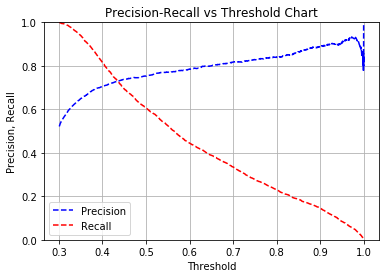

In [254]:
from sklearn.metrics import precision_recall_curve

clf = LogisticRegression(solver="liblinear", C =1 , penalty = "l2").fit(X_train2, y_train2.ravel())
pred_y=clf.predict(X_test2) 

probs_y=clf.predict_proba(X_test2) 
precision, recall, thresholds = precision_recall_curve(y_test2, probs_y[:, 1]) 
   
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.grid()

Looking at the chart we can see how the precision and recall will be affected by a change in the Threshold of the model. Again, the most important factor is the precision, as we must make sure to avoid as many False Positives as possible. This is why we will reset the threshold to 0.6. This will severely increase the number of False Negatives as there will be a lot less positive classifications, however it will increase our prediction accuracy for those positive classifications.

In [259]:
new_probs_y = clf.predict_proba(X_test2)[:,1]
predict_mine = np.where(new_probs_y > 0.61, 1, 0)
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test2, predict_mine))
print("Classification Report")
print(metrics.classification_report(y_test2,predict_mine))

Confusion Matrix
[[3633  516]
 [2503 1919]]
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.88      0.71      4149
           1       0.79      0.43      0.56      4422

   micro avg       0.65      0.65      0.65      8571
   macro avg       0.69      0.65      0.63      8571
weighted avg       0.69      0.65      0.63      8571



With the paratmers changed, we now have a model that has a 79% precision score. 

<h1> Conclusion</h1> 

To improve on this model, further investigation could be down to add additional features to the model, such as education. However, I think the greater improvement to the model could occur if information was collected on material interactivity on Exam assessed units and TMA units. 
